derse başlamadan yüklemeniz gereken kütüphaneler
seaborn
scipy.stats
statsmodels

şu komut ile yüklenebilir

"pip install seaborn scipy statsmodels"

# Gerekli kütüphanelerin import edilmesi

In [2]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### datayı kodda kullanmak için okuyalım

datanin özelliklerine ve ilk 5 satıra göz atalım

In [3]:
df = pd.read_csv("22may-data2.csv")

# Show basic information and first few rows
df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   isim      62 non-null     object
 1   yaş       62 non-null     int64 
 2   cinsiyet  62 non-null     object
 3   grup      62 non-null     int64 
 4   apati     62 non-null     int64 
 5   sbst      62 non-null     int64 
 6   wms       62 non-null     int64 
 7   mmse      62 non-null     int64 
 8   gdö       62 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.5+ KB


,isim,yaş,cinsiyet,grup,apati,sbst,wms,mmse,gdö
0,katılımcı1,63,E,0,23,11,8,27,16
1,katılımcı2,53,K,0,24,10,11,28,3
2,katılımcı3,65,K,0,34,10,7,28,22
3,katılımcı4,58,E,0,18,15,14,28,2
4,katılımcı5,53,E,0,27,13,13,28,15


### descriptive istatistiklere göz atalım

In [4]:
df.describe()

,yaş,grup,apati,sbst,wms,mmse,gdö
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,65.241935,0.838710,26.322581,7.903226,6.677419,24.177419,7.758065
std,10.833593,0.833589,7.498140,4.944643,4.272574,4.904077,5.858119
min,46.000000,0.000000,18.000000,0.000000,0.000000,10.000000,0.000000
25%,56.250000,0.000000,20.250000,4.000000,4.000000,22.000000,3.250000
50%,63.500000,1.000000,25.000000,9.000000,7.000000,25.500000,6.000000
75%,74.750000,2.000000,29.000000,12.000000,10.000000,28.000000,11.750000
max,90.000000,2.000000,50.000000,15.000000,14.000000,30.000000,22.000000


### spesifik olarak ortalama, std ve median değerleri

In [6]:
print("Apati ort:", df["apati"][df['grup'] == 1].mean())
print("apati standart sapma:", df["apati"].std())
print("apati median:", df["apati"].median())

Apati ort: 26.5
apati standart sapma: 7.498140083147586
apati median: 25.0


### df.groupby() ile cinsiyete göre tek bir test skorlarına bakabiliriz

In [11]:
df.groupby("grup")["yaş"].mean()

grup
0    58.333333
1    67.000000
2    74.352941
Name: yaş, dtype: float64

### veya yine df.groupby() ile datadaki çalışma gruplarına göre belli testlerin sonuçlarına göz atabiliriz

In [15]:
df.groupby("grup")[["apati", "sbst", "mmse", "gdö"]].mean()

,apati,sbst,mmse,gdö
grup,,,,
0,22.259259,11.925926,27.888889,6.333333
1,26.500000,7.222222,24.055556,8.000000
2,32.588235,2.235294,18.411765,9.764706


### datadaki mmse skorlarının dağılımını gösteren bir histogram çizelim

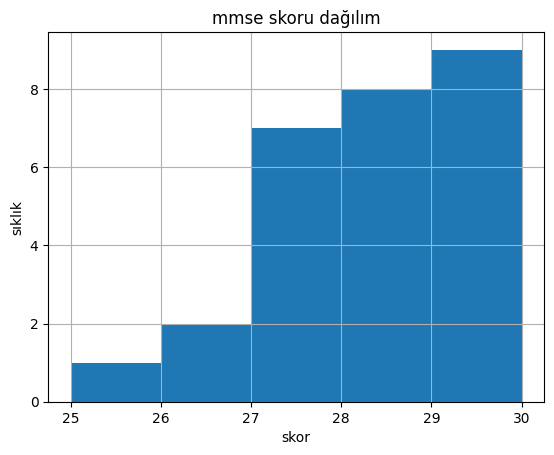

In [22]:

df["mmse"][df['grup'] == 0].hist(bins=5)
plt.title("mmse skoru dağılım")
plt.xlabel("skor")
plt.ylabel("sıklık")
plt.show()

## seaborn, matplotlib gibi data görselleştirmesinde kullanılan bir kütüphane

küçük bir örnekle seaborn'u deneyelim.

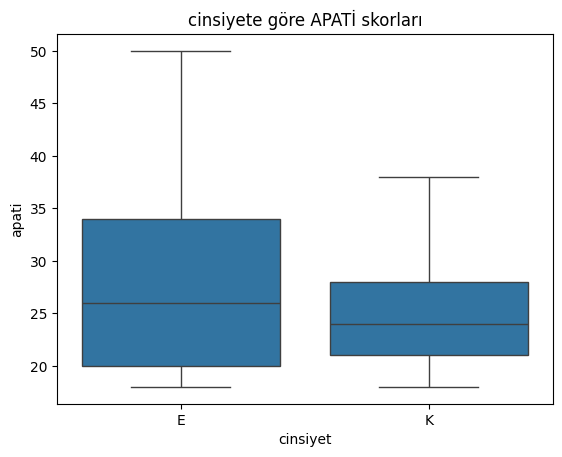

In [29]:

# Boxplot to compare Test1 by gender
sns.boxplot(x="cinsiyet", y="apati", data=df)
plt.title("cinsiyete göre APATİ skorları")
plt.show()

çok benzerini başka bir istatistik için matplotlib ile de yapabiliriz

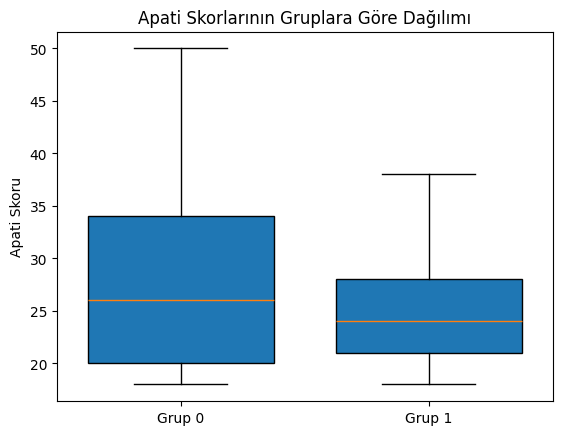

In [30]:
group0_apati = df[df["cinsiyet"] == 'E']["apati"]
group1_apati = df[df["cinsiyet"] == 'K']["apati"]

plt.boxplot([group0_apati, group1_apati], tick_labels=["Grup 0", "Grup 1"], patch_artist=True, widths=0.75)
plt.title("Apati Skorlarının Gruplara Göre Dağılımı")
plt.ylabel("Apati Skoru")
plt.grid(False)
plt.savefig('apaticinsiyet.png')
plt.show()

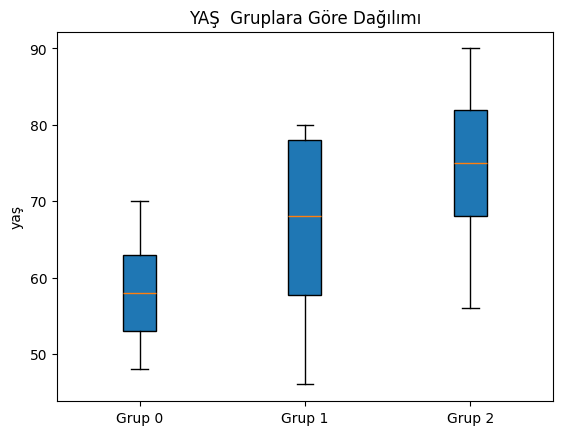

In [49]:
group0_apati = df[df["grup"] == 0]["yaş"]
group1_apati = df[df["grup"] == 1]["yaş"]
group2_apati = df[df["grup"] == 2]["yaş"]

plt.boxplot([group0_apati, group1_apati, group2_apati], tick_labels=["Grup 0", "Grup 1", 'Grup 2'], patch_artist=True, widths=0.2)
plt.title("YAŞ  Gruplara Göre Dağılımı")
plt.ylabel("yaş")
plt.grid(False)
plt.savefig('yaşgrup.png')
plt.show()

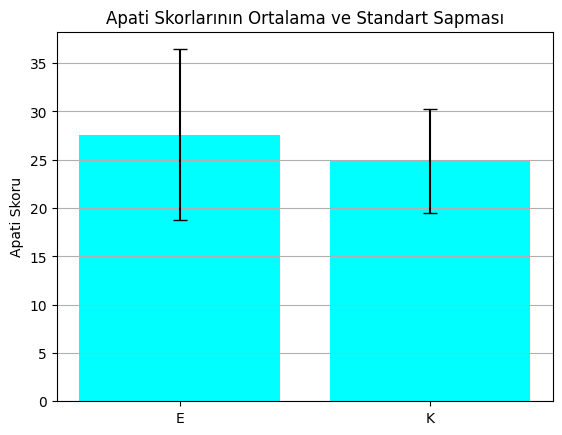

In [43]:
means = [group0_apati.mean(), group1_apati.mean()]
stds = [group0_apati.std(), group1_apati.std()]

plt.bar(["E", "K"], means, yerr=stds, capsize=5, color='cyan')
plt.title("Apati Skorlarının Ortalama ve Standart Sapması")
plt.ylabel("Apati Skoru")
plt.grid(True, axis='y')
plt.show()

## scipy modülü ile biraz daha detaylı istatistiksel analizler

datada hasta gruplarını içeren bir sütun olduğunu biliyoruz. hasta grupları 0, 1 ve 2 numaralarıyla ayırılmış. buna göre iki grup arasında belli bir testte anlamlı bir fark var mı gözlemlemek istersek independent sample t-test kullanabiliriz.

__hipotez__: 0 ve 1 grupları arasında apati skorları arasında fark vardır.



In [51]:
group0 = df[df["grup"] == 0]["gdö"]
group1 = df[df["grup"] == 1]["gdö"]

t_stat, p_val = st.ttest_ind(group0, group1)
print("T-istatistiği:", t_stat)
print("P-değeri:", p_val)

T-istatistiği: -0.9355050007952337
P-değeri: 0.35475244486540025


p değerinin 0.05'ten küçük olması bu hipotezi doğrulamış oldu

__hipotez__: erkekler ve kadınlar arasında apati skorlarında anlamlı fark vardır.


In [55]:
male_wms = df[df["cinsiyet"] == "E"][df['grup'] == 2]["apati"]
female_wms = df[df["cinsiyet"] == "K"][df['grup'] == 2]["apati"]

t_stat, p_val = st.ttest_ind(male_wms, female_wms)
print("T-istatistiği:", t_stat)
print("P-değeri:", p_val)

T-istatistiği: 1.7089298548585292
P-değeri: 0.10806620459648027


/var/folders/0y/l_dqpvhx70jbj1lqtt9c2p140000gn/T/ipykernel_26055/3568664005.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_wms = df[df["cinsiyet"] == "E"][df['grup'] == 2]["apati"]
/var/folders/0y/l_dqpvhx70jbj1lqtt9c2p140000gn/T/ipykernel_26055/3568664005.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_wms = df[df["cinsiyet"] == "K"][df['grup'] == 2]["apati"]


p değerinin 0.05'ten büyük olması bu hipotezimizi doğrulamadı. 

In [63]:
df["yaş_grubu"] = pd.cut(df["yaş"], bins=[0, 50, 60, 100], labels=["<50", "50-60", ">60"])

df.groupby('yaş_grubu')['yaş'].mean()

/var/folders/0y/l_dqpvhx70jbj1lqtt9c2p140000gn/T/ipykernel_26055/3827738416.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('yaş_grubu')['yaş'].mean()


yaş_grubu
<50      47.000000
50-60    55.391304
>60      72.351351
Name: yaş, dtype: float64

In [68]:
gencler_yas = df[df['yaş_grubu'] == '<50']['mmse']
yaslilar_yas = df[df['yaş_grubu'] == '>60']['mmse']

tstat, pval = st.ttest_ind(gencler_yas, yaslilar_yas)
print(pval)

0.14469130428321994


In [66]:
# Grupları ayır
group1 = df[df["yaş_grubu"] == "<50"]["sbst"]
group2 = df[df["yaş_grubu"] == "50-60"]["sbst"]
group3 = df[df["yaş_grubu"] == ">60"]["sbst"]

## One-way ANOVA

3 grup arasında wms testinde anlamlı fark mı?

In [71]:
group_0 = df[df["grup"] == 0]["sbst"]
group_1 = df[df["grup"] == 1]["sbst"]
group_2 = df[df["grup"] == 2]["sbst"]

f_stat, p_val = st.f_oneway(group_0, group_1, group_2)

print("F-istatistiği:", f_stat)
print("P-değeri:", p_val)

F-istatistiği: 58.489907952566604
P-değeri: 9.976541229351031e-15


yaşa göre gruplayıp, bu yaş gruplarında sbst skorları arasında anlamlı fark var mı?

_dikkat edilmesi gereken şey, burada 3 grup karşılaştırma yapıyoruz, ikili karşılaştırmalar için post-hoc analiz gerekir. Tukey ile post hoc analiz de yapabiliriz. İlerde göreceğiz_

In [74]:
df["yaş_grubu"] = pd.cut(df["yaş"], bins=[0, 50, 60, 100], labels=["<50", "50-60", ">60"])

# Grupları ayır
group1 = df[df["yaş_grubu"] == "<50"]["wms"]
group2 = df[df["yaş_grubu"] == "50-60"]["wms"]
group3 = df[df["yaş_grubu"] == ">60"]["wms"]

# ANOVA
f_stat, p_val = st.f_oneway(group1, group2, group3)

print("F-istatistiği:", f_stat)
print("P-değeri:", p_val)

F-istatistiği: 10.965105702403104
P-değeri: 8.930369640205378e-05


## data normal dağılım gösteriyor mu

In [75]:
apt_degerler = df['apati']
st.shapiro(apt_degerler)

ShapiroResult(statistic=np.float64(0.8906642558626959), pvalue=np.float64(4.698540138463481e-05))

oneway anovaya iki grup verirsek ind.sample ttest ile aynı sonucu verir



In [ ]:
group0 = df[df["grup"] == 1]["gdö"]
group1 = df[df["grup"] == 2]["gdö"]

f_stat, p_val = st.f_oneway(group0, group1)
print("F-istatistiği:", f_stat)
print("P-değeri:", p_val)

### anova sonrası ikili karşılaştırmalar

In [77]:
sbst1 = df[df["grup"] == 0]["gdö"]
sbst2 = df[df["grup"] == 1]["gdö"]
sbst3 = df[df["grup"] == 2]["gdö"]

print(sbst1)
# Girdiler:
# data: bağımlı değişken (örneğin sbst skorları)
# groups: kategorik grup etiketleri
results = st.tukey_hsd(sbst1,sbst2,sbst3)

print(results)

0     16
1      3
2     22
3      2
4     15
5      2
6      0
7      5
8      4
9     10
10     6
11     5
12     7
13    11
14     0
15     4
16    10
17     0
18     7
19     2
20     0
21     0
22     1
23     0
24    10
25    18
26    11
Name: gdö, dtype: int64
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.667     0.612    -5.893     2.560
 (0 - 2)     -3.431     0.142    -7.732     0.869
 (1 - 0)      1.667     0.612    -2.560     5.893
 (1 - 2)     -1.765     0.640    -6.462     2.933
 (2 - 0)      3.431     0.142    -0.869     7.732
 (2 - 1)      1.765     0.640    -2.933     6.462



grafiği de çizelim

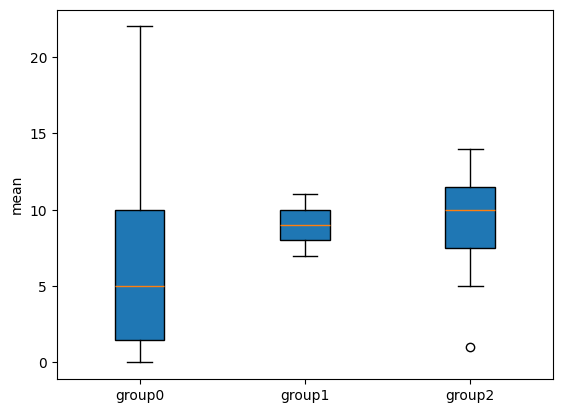

In [79]:

fig, ax = plt.subplots(1, 1)
ax.boxplot([group0, group1, group2], patch_artist=True)
ax.set_xticklabels(["group0", "group1", "group2"]) 
ax.set_ylabel("mean") 
plt.show()

post-hoc için statsmodels kütüphanesini de kullanabiliriz

In [87]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sonuc = pairwise_tukeyhsd(endog=df["apati"], groups=df["grup"], alpha=0.05)
print(sonuc.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   4.2407 0.0753 -0.3427  8.8242  False
     0      2   10.329    0.0  5.6653 14.9926   True
     1      2   6.0882 0.0153   0.994 11.1824   True
----------------------------------------------------


sonuçları da excel'e veya csv dosyasına bu şekilde aktarabiliriz

In [90]:
sonuc_df = pd.DataFrame(data=sonuc._results_table.data[1:], columns=sonuc._results_table.data[0])

sonuc_df.head()

sonuc_df.to_excel('out.xlsx', index=False)  


## korelasyon analizi

In [92]:

r_val, p_val = st.pearsonr(df["yaş"], df["apati"])

print("Pearson Korelasyon Katsayısı:", r_val)
print("P-değeri:", p_val)

Pearson Korelasyon Katsayısı: 0.4960831487582044
P-değeri: 4.126538843331075e-05


In [93]:

rho, p_val = st.spearmanr(df["gdö"], df["apati"])

print("Spearman Korelasyon Katsayısı:", rho)
print("P-değeri:", p_val)

Spearman Korelasyon Katsayısı: 0.5121911108471212
P-değeri: 2.08649177856879e-05


korelasyon analizinin görseli için scatter plot çizelim

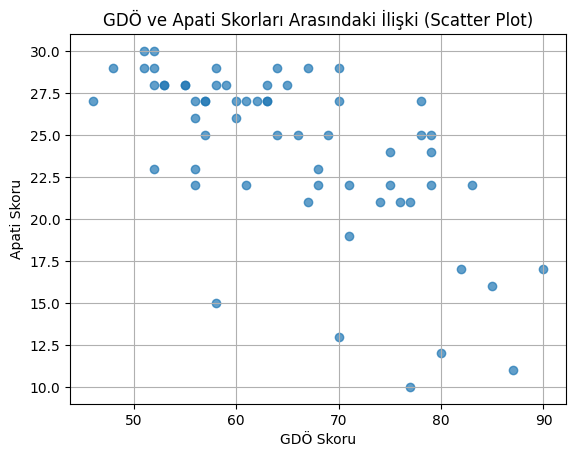

In [94]:
x = df["yaş"]
y = df['mmse']

plt.scatter(x, y, alpha=0.7)
plt.title("GDÖ ve Apati Skorları Arasındaki İlişki (Scatter Plot)")
plt.xlabel("GDÖ Skoru")
plt.ylabel("Apati Skoru")
plt.grid(True)
plt.show()

regresyon çizgisi ile daha iyi görsel

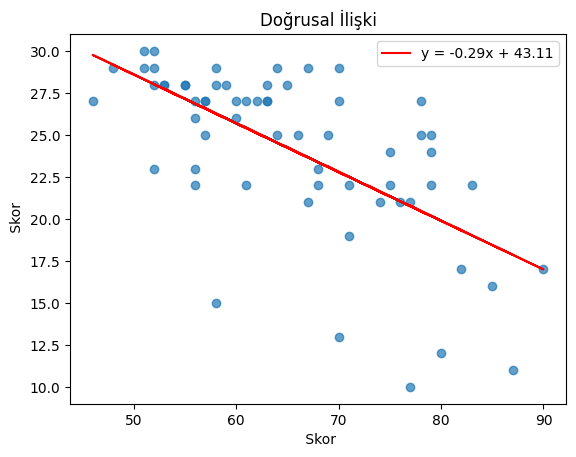

In [98]:
x = df["yaş"]
y = df['mmse']

plt.scatter(x, y, alpha=0.7)

# Regresyon çizgisi
m, b = np.polyfit(x, y, 1)  # y = mx + b
plt.plot(x, m*x + b, color='red', label=f"y = {m:.2f}x + {b:.2f}")

plt.title("Doğrusal İlişki")
plt.xlabel(" Skor")
plt.ylabel(" Skor")
plt.legend()
plt.grid(False)
plt.savefig('scatterplt_yasmmse.png')

bir çok testin korelasyonunu heatmap olarak grafiğe dökebiliriz

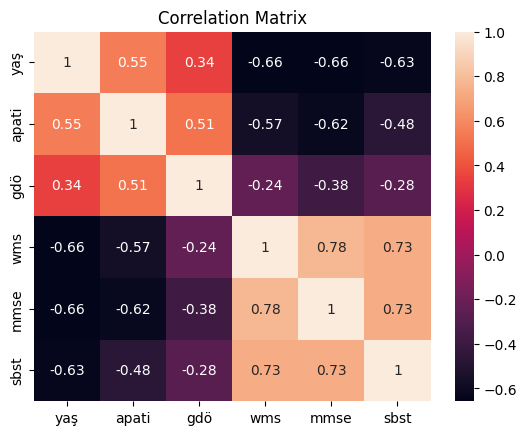

In [103]:
sns.color_palette("viridis", as_cmap=True)

sns.heatmap(df[["yaş", "apati", "gdö", "wms", "mmse", "sbst"]].corr(method='spearman'), annot=True)

plt.title("Correlation Matrix")
plt.show()

yine benzer grafiği seaborn yerine matplotlib ile çizebiliriz

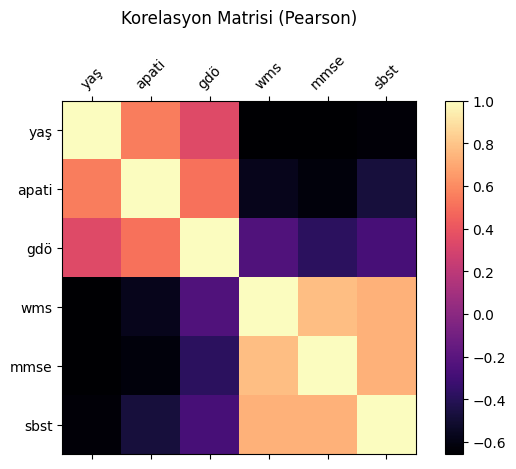

In [104]:
columns = ["yaş", "apati", "gdö", "wms", "mmse", "sbst"]
corr_matrix = df[columns].corr(method="spearman")

fig, ax = plt.subplots()

# Korelasyon matrisi görselleştir
cax = ax.matshow(corr_matrix, cmap="magma")  # cmap değiştirilebilir: "viridis", "plasma", "coolwarm", vs.
fig.colorbar(cax)

# Eksen etiketlerini ekle
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation=45)
ax.set_yticklabels(columns)

plt.title("Korelasyon Matrisi (Pearson)", pad=20)
plt.tight_layout()
plt.show()

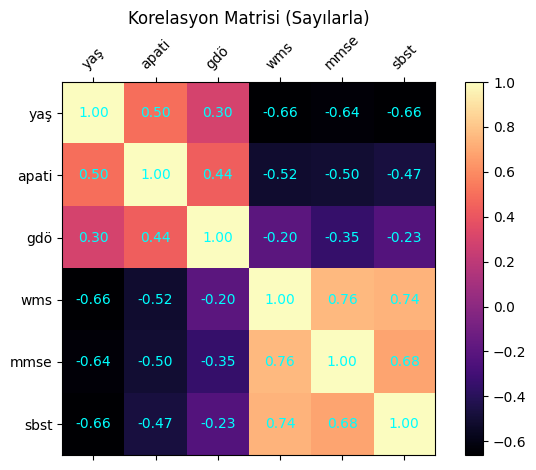

In [106]:
columns = ["yaş", "apati", "gdö", "wms", "mmse", "sbst"]
corr_matrix = df[columns].corr(method="pearson")

fig, ax = plt.subplots()
cax = ax.matshow(corr_matrix, cmap="magma")
fig.colorbar(cax)

ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation=45)
ax.set_yticklabels(columns)

# Hücre içi korelasyon katsayılarını yaz
for i in range(len(columns)):
    for j in range(len(columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f"{value:.2f}", ha="center", va="center", color="cyan")

plt.title("Korelasyon Matrisi (Sayılarla)")
plt.tight_layout()
plt.show()